In [1]:
import sys
sys.path.append('../')

import cii
import cii.datagen as dg
import cii.model as md
import cii.portfolio as pfo
import cii.strategy as stg
import pandas as pd

from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
df_btc = pd.read_csv('..\data\coinapi_ohlcv_GEMINI_SPOT_BTC_USD_1DAY_data.csv')
df_eth = pd.read_csv('..\data\coinapi_ohlcv_GEMINI_SPOT_ETH_USD_1DAY_data.csv')

In [3]:
df_btc = dg.convert_coinapi_data(df_btc)
df_eth = dg.convert_coinapi_data(df_eth)
df_btc.head()

,price_close,price_open,price_high,price_low,time_close,time_open,trades_count,volume_traded
0,4591.38,4431.66,4705.07,4431.65,2017-08-30T00:00:00.0000000Z,2017-08-29T00:00:00.0000000Z,8315,6005.454508
1,4583.85,4590.00,4641.43,4495.05,2017-08-31T00:00:00.0000000Z,2017-08-30T00:00:00.0000000Z,14313,8832.814987
2,4736.28,4583.00,4762.76,4579.91,2017-09-01T00:00:00.0000000Z,2017-08-31T00:00:00.0000000Z,11407,7268.196353
3,4924.00,4736.28,4924.00,4709.28,2017-09-02T00:00:00.0000000Z,2017-09-01T00:00:00.0000000Z,11470,8188.879244
4,4642.85,4924.00,4985.00,4505.00,2017-09-03T00:00:00.0000000Z,2017-09-02T00:00:00.0000000Z,20976,13402.051241


In [1]:

import numpy as np
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

D:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
import sys
sys.path.append('../')

import cii
import cii.datagen as dg
import cii.model as md
import cii.portfolio as pfo
import cii.strategy as stg
import pandas as pd

from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

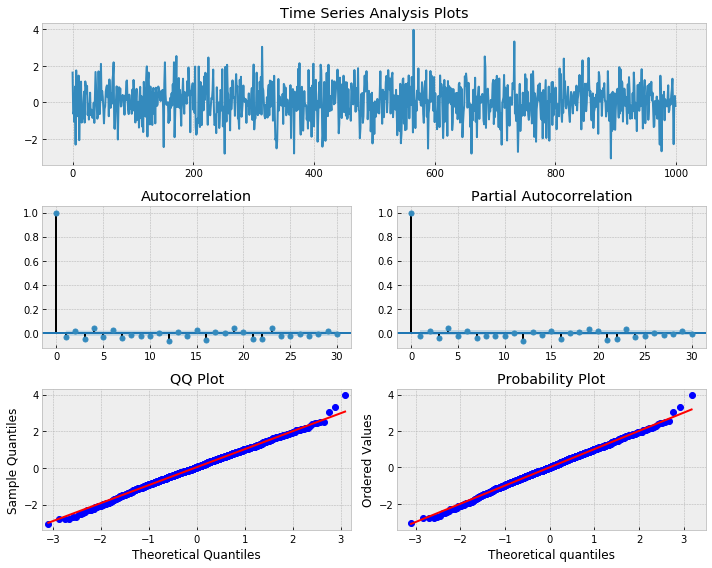

In [5]:
np.random.seed(1)

# plot of discrete white noise
randser = np.random.normal(size=1000)
tsplot(randser, lags=30)

In [11]:
df_btc = pd.read_csv('..\data\coinapi_ohlcv_GEMINI_SPOT_BTC_USD_1DAY_data.csv')
df_eth = pd.read_csv('..\data\coinapi_ohlcv_GEMINI_SPOT_ETH_USD_1DAY_data.csv')

In [12]:
df_btc = dg.convert_coinapi_data(df_btc)
df_eth = dg.convert_coinapi_data(df_eth)
df_btc.head()

,price_close,price_open,price_high,price_low,time_close,time_open,trades_count,volume_traded
0,4591.38,4431.66,4705.07,4431.65,2017-08-30T00:00:00.0000000Z,2017-08-29T00:00:00.0000000Z,8315,6005.454508
1,4583.85,4590.00,4641.43,4495.05,2017-08-31T00:00:00.0000000Z,2017-08-30T00:00:00.0000000Z,14313,8832.814987
2,4736.28,4583.00,4762.76,4579.91,2017-09-01T00:00:00.0000000Z,2017-08-31T00:00:00.0000000Z,11407,7268.196353
3,4924.00,4736.28,4924.00,4709.28,2017-09-02T00:00:00.0000000Z,2017-09-01T00:00:00.0000000Z,11470,8188.879244
4,4642.85,4924.00,4985.00,4505.00,2017-09-03T00:00:00.0000000Z,2017-09-02T00:00:00.0000000Z,20976,13402.051241


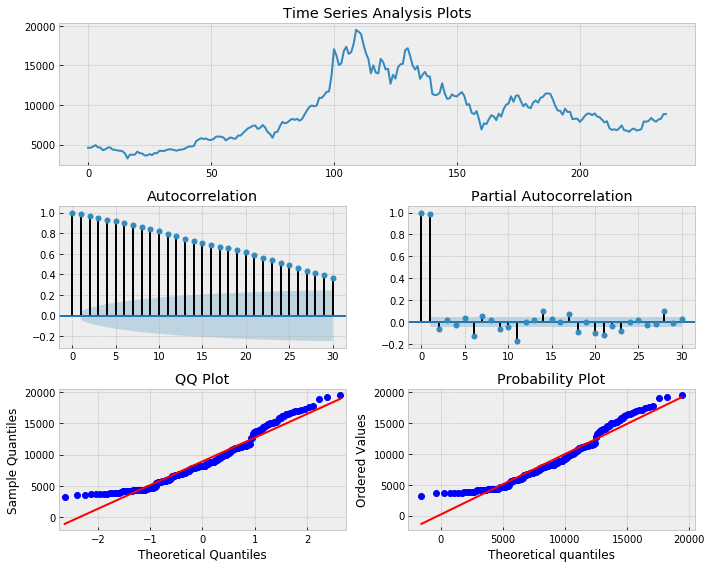

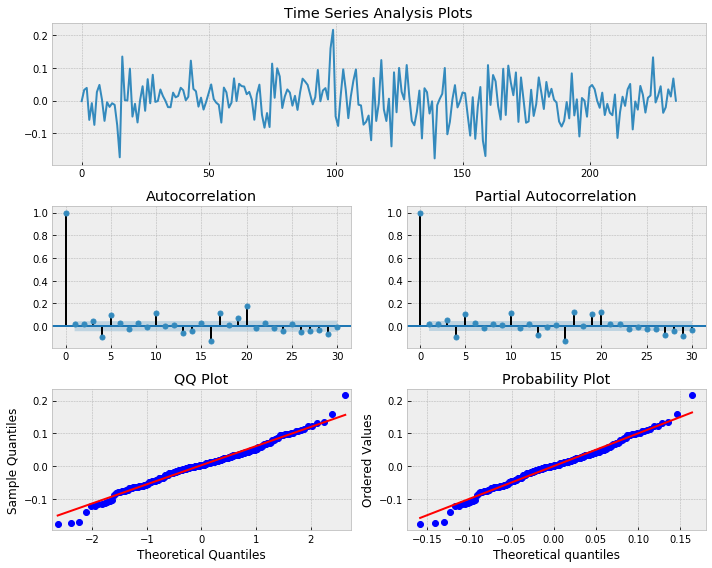

In [59]:
tsplot(df_btc['price_close'], lags=30)
logret_btc=np.diff(np.log(df_btc['price_close'].as_matrix()))
tsplot(logret_btc,lags=30)


In [60]:
## Fitting AR(1) Model
mdl = smt.AR(logret_btc).fit(maxlag=30, ic='aic', trend='nc')
est_order = smt.AR(logret_btc).select_order(maxlag=30, ic='aic', trend='nc')

print('\nalpha estimate: {:3.5f} | best lag order = {}'.format(mdl.params[0], est_order))



alpha estimate: 0.02163 | best lag order = 1


aic: -664.37360 | order: (3, 2)


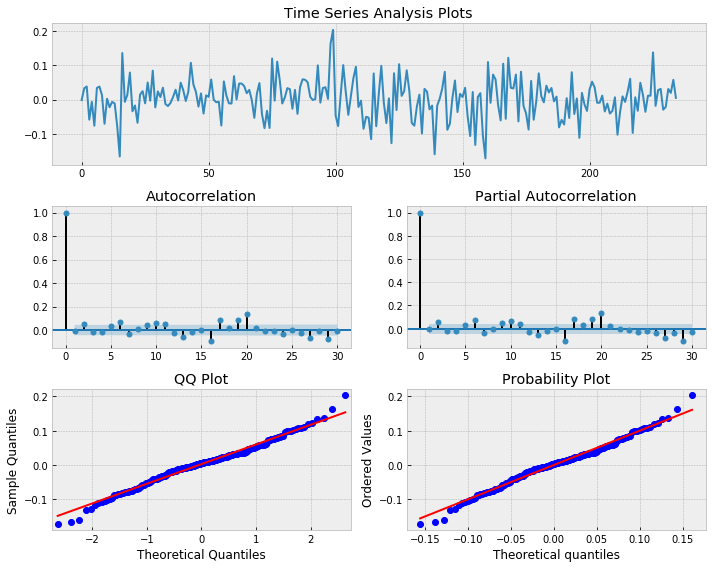

In [61]:
## Fitting ARMA(p,q) Model
import warnings
warnings.filterwarnings('ignore')

max_lag = 30
best_aic = np.inf 
best_order = None
best_mdl = None

rng = range(5)
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(logret_btc, order=(i, j)).fit(method='mle', trend='nc')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue
            
print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
# ARMA model resid plot
_ = tsplot(best_mdl.resid, lags=30)

aic: -664.37360 | order: (3, 0, 2)


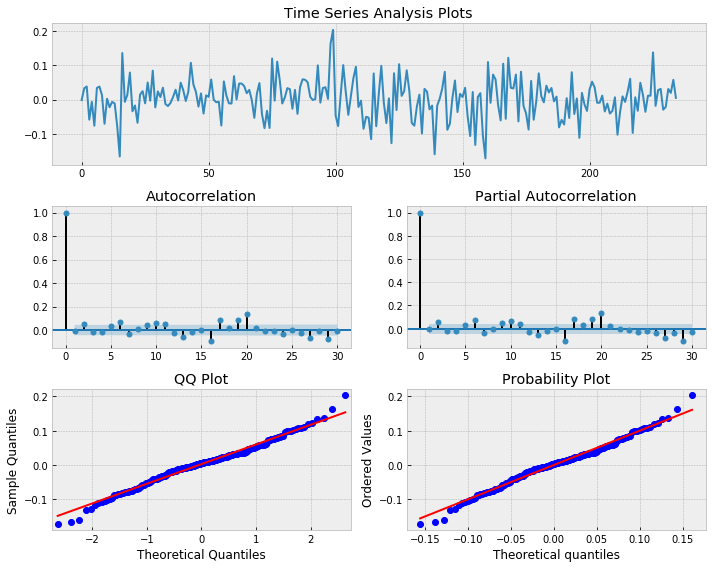

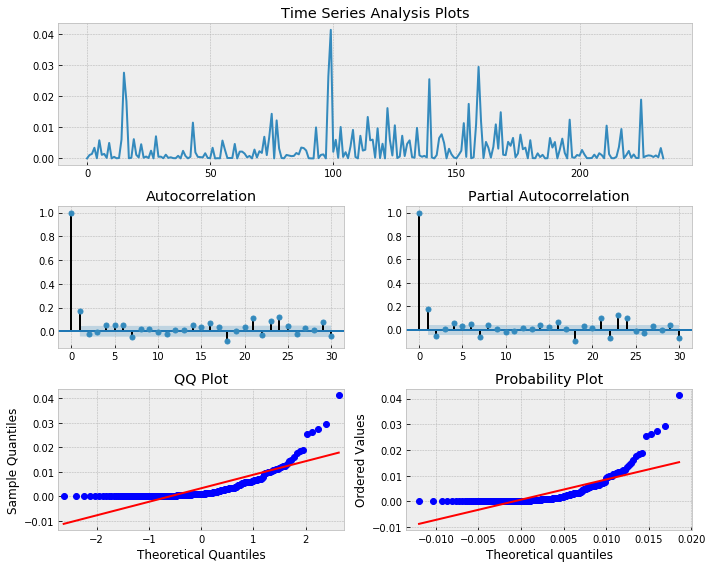

In [64]:
# Fit ARIMA(p, d, q) model 
# pick best order and final model based on aic
import warnings
warnings.filterwarnings('ignore')

best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(5) # [0,1,2,3,4]
d_rng = range(29) # [0,1]
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = smt.ARIMA(logret_btc, order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue
print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
# aic: -11518.22902 | order: (4, 0, 4)

# ARIMA model resid plot
_ = tsplot(best_mdl.resid, lags=30)

# ARIMA model squared resid plot
_ = tsplot(np.square(best_mdl.resid), lags=30)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                338.116
Distribution:                  Normal   AIC:                          -662.232
Method:            Maximum Likelihood   BIC:                          -638.015
                                        No. Observations:                  235
Date:                Thu, May 03 2018   Df Residuals:                      228
Time:                        21:43:24   Df Model:                            7
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.7506e-03  3.451e-03      1.087      0.277 

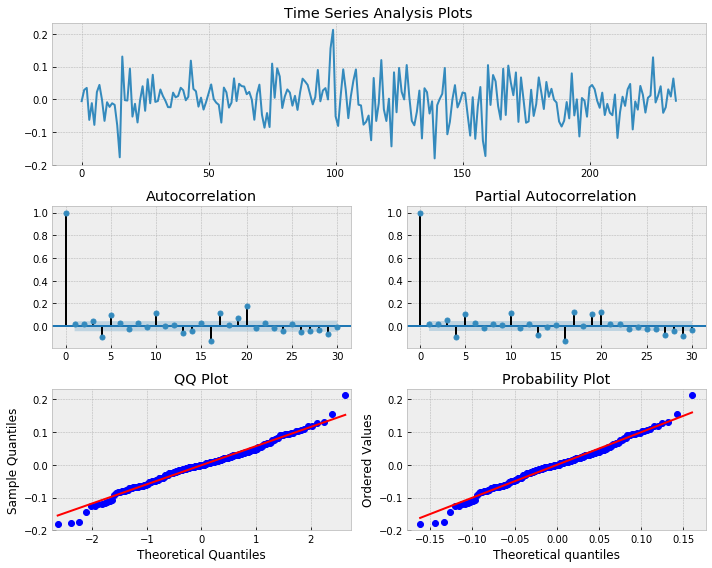

In [90]:
# Now we can fit the arch model using the best fit arima model parameters

p_ = best_order[0]
o_ = best_order[1]
q_p_ = best_order[2]

# Using student T distribution usually provides better fit
am = arch_model(logret_btc, p=p_, o=o_, q=q_, dist='Normal')
res = am.fit(update_freq=5, disp='off')
print(res.summary())

_ = tsplot(res.resid, lags=30)

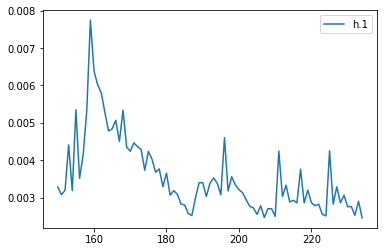

In [104]:
split_date=150
res_f = am.fit(update_freq=5, disp='off',last_obs=split_date)
forecasts = res_f.forecast(start=split_date)
forecasts.variance[split_date:].plot()

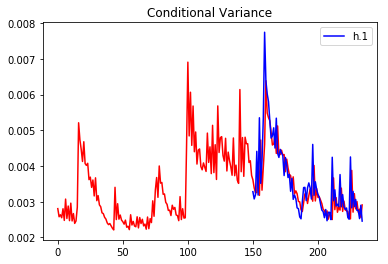

In [105]:
fig, ax = plt.subplots(1,1)
#res.conditional_volatility
pd.Series(res.conditional_volatility ** 2.0).plot(ax=ax, title='Conditional Variance',color='red')
plt.hold('on')
forecasts.variance[split_date:].plot(ax=ax,color='blue')

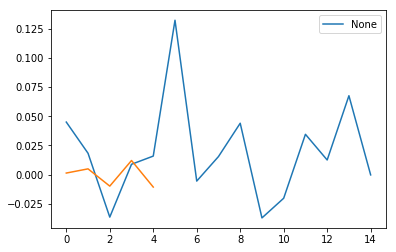

[-0.02031988  0.03446749  0.01244822  0.06753647 -0.0003188 ]


In [142]:
split_date_2=230
mdl_f = smt.ARIMA(logret_btc, order=(p_,o_,q_)).fit(method='mle', trend='nc',last_obs=split_date_2)

logret_forecasts = mdl_f.forecast(steps=logret_btc.size-split_date_2)
logret_btc.size

fig, ax = plt.subplots()
ax = pd.Series(logret_btc[split_date_2-10:]).plot(ax=ax)
best_mdl.plot_predict(start=split_date_2,dynamic=True,ax=ax,plot_insample=False)
plt.show()

print(logret_btc[split_date_2:])

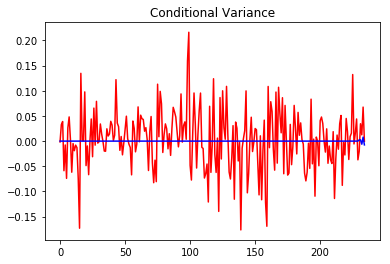

In [121]:
fig, ax = plt.subplots(1,1)
#res.conditional_volatility
pd.Series(best_mdl).plot(ax=ax, title='Conditional Variance',color='red')
plt.hold('on')
pd.Series(np.append(np.zeros(split_date_2),logret_forecasts[0])).plot(ax=ax,color='blue')